Question 1

In [1]:
import pandas as pd

train_df = pd.read_csv('/content/train_preprocessed.csv') #reading the train preprocessed data
test_df = pd.read_csv('/content/test_preprocessed.csv') #reading the test preprocessed data

In [2]:
print(train_df) #looking at the data

     Survived  Pclass  Sex   Age     Fare  Embarked
0           0       3    0  22.0   7.2500         0
1           1       1    1  38.0  71.2833         1
2           1       3    1  26.0   7.9250         0
3           1       1    1  35.0  53.1000         0
4           0       3    0  35.0   8.0500         0
..        ...     ...  ...   ...      ...       ...
886         0       2    0  27.0  13.0000         0
887         1       1    1  19.0  30.0000         0
888         0       3    1  29.0  23.4500         0
889         1       1    0  26.0  30.0000         1
890         0       3    0  32.0   7.7500         2

[891 rows x 6 columns]


In [3]:
print(test_df) #looking at the data

     PassengerId  Pclass  Sex   Age      Fare  Embarked
0            892       3    0  34.5    7.8292         2
1            893       3    1  47.0    7.0000         0
2            894       2    0  62.0    9.6875         2
3            895       3    0  27.0    8.6625         0
4            896       3    1  22.0   12.2875         0
..           ...     ...  ...   ...       ...       ...
413         1305       3    0  29.0    8.0500         0
414         1306       1    1  39.0  108.9000         1
415         1307       3    0  38.5    7.2500         0
416         1308       3    0  29.0    8.0500         0
417         1309       3    0  29.0   22.3583         1

[418 rows x 6 columns]


In [4]:
print(train_df['Survived'].value_counts(dropna='False')) #getting the number of classes. Total of two classes 

0    549
1    342
Name: Survived, dtype: int64


In [5]:
print(train_df.isnull().sum()) # seeing how many null values are there in each column 

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64


In [7]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
1,1,0.742038
0,0,0.188908


Yes,it would be ok to keep the feature becauase it allows us to know who survied based on gender which can be used for other correlations. 

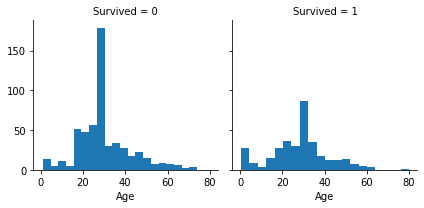

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

graph1 = sns.FacetGrid(train_df,col='Survived')
graph1.map(plt.hist, 'Age', bins=20)

In [9]:
combine = [train_df, test_df]

In [10]:
print(combine)

[     Survived  Pclass  Sex   Age     Fare  Embarked
0           0       3    0  22.0   7.2500         0
1           1       1    1  38.0  71.2833         1
2           1       3    1  26.0   7.9250         0
3           1       1    1  35.0  53.1000         0
4           0       3    0  35.0   8.0500         0
..        ...     ...  ...   ...      ...       ...
886         0       2    0  27.0  13.0000         0
887         1       1    1  19.0  30.0000         0
888         0       3    1  29.0  23.4500         0
889         1       1    0  26.0  30.0000         1
890         0       3    0  32.0   7.7500         2

[891 rows x 6 columns],      PassengerId  Pclass  Sex   Age      Fare  Embarked
0            892       3    0  34.5    7.8292         2
1            893       3    1  47.0    7.0000         0
2            894       2    0  62.0    9.6875         2
3            895       3    0  27.0    8.6625         0
4            896       3    1  22.0   12.2875         0
..           .

In [11]:
X_train = train_df.drop('Survived',axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis=1).copy()
print(train_df[train_df.isnull().any(axis=1)])

Empty DataFrame
Columns: [Survived, Pclass, Sex, Age, Fare, Embarked]
Index: []


In [12]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train,Y_train)*100,2)
print("SVM accuracy: ", acc_svc)

SVM accuracy:  68.35


In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train,Y_train)*100,2)
print("KNN accuracy is ", acc_knn)

KNN accuracy is  83.5


Question 2

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [15]:
dataset_2 = pd.read_csv('/content/glass.csv')
dataset_2.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [ ]:
dataset_2.isnull().sum() #checking for null values in each column 

In [17]:
X = dataset_2[['RI','Na','Mg', 'Al', 'Si', 'K', 'Ca', 'Ba','Fe']]
y = dataset_2['Type']

In [18]:
X.shape, y.shape

((214, 9), (214,))

In [19]:
X_train2,X_test2, y_train2, y_test2 = train_test_split(X,y, test_size=0.30, random_state=0) #spliting my data into test and train sets

In [20]:
print(X_train2[0:10])
print('\n')
print(X_test2[0:10])

          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe
111  1.52739  11.02  0.00  0.75  73.08  0.00  14.96  0.00  0.00
159  1.51796  13.50  3.36  1.63  71.94  0.57   8.81  0.00  0.09
24   1.51720  13.38  3.50  1.15  72.85  0.50   8.43  0.00  0.00
30   1.51768  12.65  3.56  1.30  73.08  0.61   8.69  0.00  0.14
60   1.51905  13.60  3.62  1.11  72.64  0.14   8.76  0.00  0.00
56   1.51215  12.99  3.47  1.12  72.98  0.62   8.35  0.00  0.31
109  1.51818  13.72  0.00  0.56  74.45  0.00  10.99  0.00  0.00
92   1.51588  13.12  3.41  1.58  73.26  0.07   8.39  0.00  0.19
19   1.51735  13.02  3.54  1.69  72.73  0.54   8.44  0.00  0.07
161  1.51934  13.64  3.54  0.75  72.65  0.16   8.89  0.15  0.24


          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe
197  1.51727  14.70  0.00  2.34  73.28  0.00   8.95  0.66  0.00
37   1.51797  12.74  3.48  1.35  72.96  0.64   8.68  0.00  0.00
89   1.51640  12.55  3.48  1.87  73.23  0.63   8.08  0.00  0.09
176  1.51905  14.00  2.39  1.56  72.37

In [21]:
gnb = GaussianNB() #using navis bayes
gnb.fit(X_train2, y_train2)
pred = gnb.predict(X_test2)

In [22]:
from sklearn import metrics

print("Accuracy: ", round(metrics.accuracy_score(y_test2,pred),2))

Accuracy:  0.46


In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test2, pred))

              precision    recall  f1-score   support

           1       0.39      0.86      0.54        21
           2       0.50      0.12      0.19        26
           3       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       0.88      1.00      0.93         7

    accuracy                           0.46        65
   macro avg       0.41      0.50      0.41        65
weighted avg       0.44      0.46      0.37        65



Question 3

In [24]:
from sklearn import svm #using SVM linear method

svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_train2,y_train2)
y_pred3 = svm_clf.predict(X_test2)

In [25]:
print("Accuracy is: ", round(metrics.accuracy_score(y_test2,y_pred3),2))

Accuracy is:  0.57


In [26]:
print(classification_report(y_test2, y_pred3))

              precision    recall  f1-score   support

           1       0.48      0.71      0.58        21
           2       0.57      0.50      0.53        26
           3       0.00      0.00      0.00         7
           5       0.67      1.00      0.80         2
           6       0.00      0.00      0.00         2
           7       1.00      1.00      1.00         7

    accuracy                           0.57        65
   macro avg       0.45      0.54      0.48        65
weighted avg       0.51      0.57      0.53        65



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
